In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
import numpy as np
import re
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords


In [2]:
import pandas as pd
reviews = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
reviews.nunique()

review       49582
sentiment        2
dtype: int64

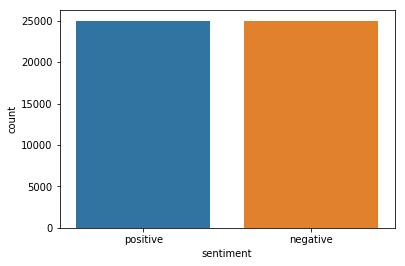

In [5]:
sns.countplot(x='sentiment',data=reviews)

In [6]:
a=reviews.values
X=a[:,0]




In [8]:
Y=reviews['sentiment']
Y = np.array(list(map(lambda x: 1 if x=="positive" else 0,Y )))

Y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
corpus=[]
for i in range (len(X)):
    review=str(X[i]).lower()
    review=re.sub(r"br"," ",review)
    review=re.sub(r"that's","that is",review)
    review=re.sub(r"what's","what is",review)
    review=re.sub(r"where's","where is",review)
    review=re.sub(r"it's","it is",review)
    review=re.sub(r"who's","who is",review)
    review=re.sub(r"i'm","i am",review)
    review=re.sub(r"she's","she is",review)
    review=re.sub(r"he's","he is",review)
    review=re.sub(r"they're","they are",review)
    review=re.sub(r"who're","who are",review)
    review=re.sub(r"wouldn't","would not",review)
    review=re.sub(r"couldn't","could not",review)
    review=re.sub(r"shouldn't","should not",review)
    review=re.sub(r"can't","can not",review)
    review=re.sub(r"won't","will not",review)
    review=re.sub(r'\W',' ',review)
    review=re.sub(r'\d',' ',review)
    review=re.sub(r'\s+[a-z]\s+',' ',review)
    review=re.sub(r'\s+[a-z]$',' ',review)
    review=re.sub(r'^[a-z]\s+','',review)
    review=re.sub(r'\s+',' ',review)
    review=re.sub(r'^\s+','',review)
    corpus.append(review)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=3000,min_df=3,max_df=0.6,stop_words=stopwords.words('english'))
X=vectorizer.fit_transform(corpus).toarray()

    

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)

0.8824

In [15]:
cm= confusion_matrix(Y_test,y_pred)
cm

array([[4396,  639],
       [ 537, 4428]])